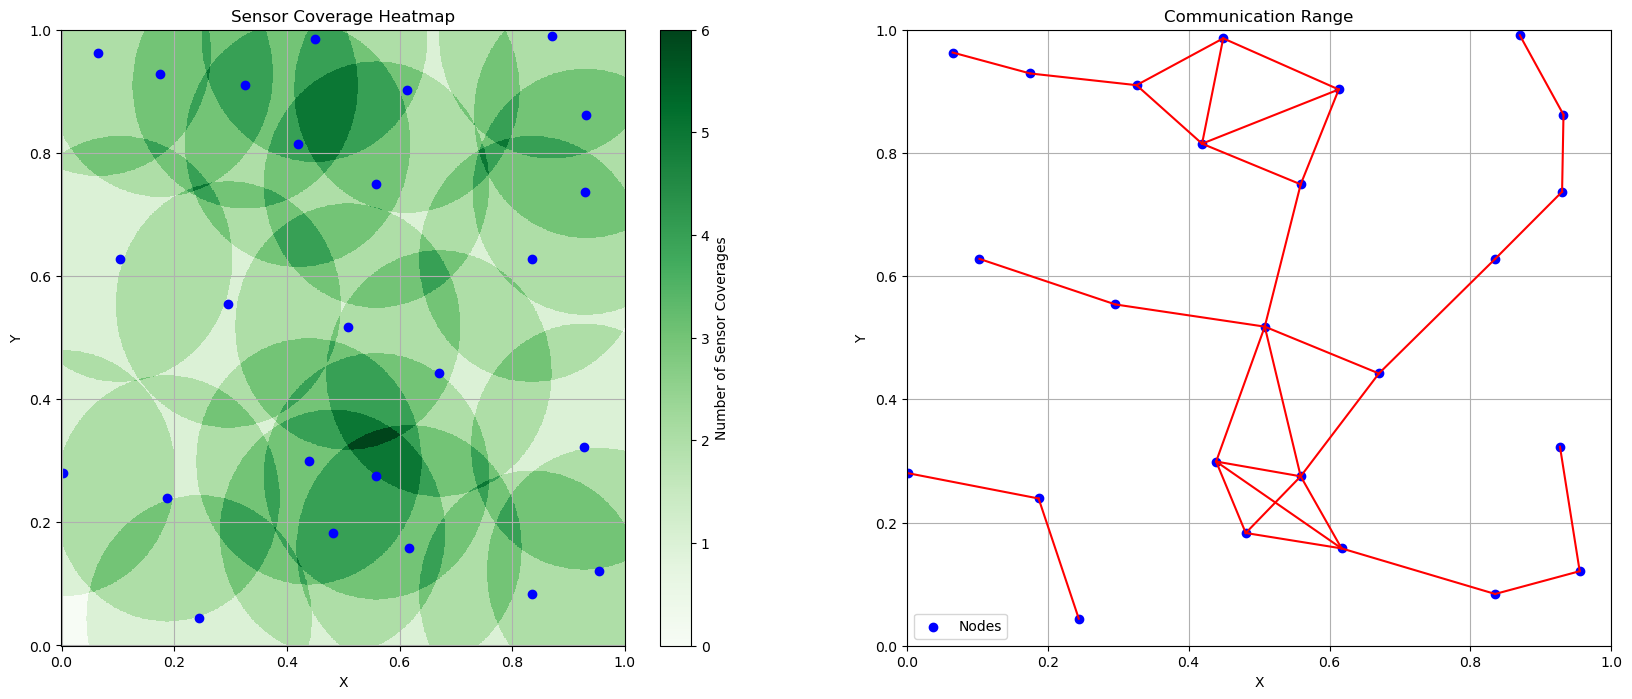

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Read node coordinates from file
with open("nodes.txt", "r") as file:
    lines = file.readlines()

# Parse coordinates
coordinates = []
for line in lines:
    x, y = map(float, line.strip().split(','))
    coordinates.append([x, y])
coordinates = np.array(coordinates)

# Environment size
L = 1.0

# Communications radius
Rc = 0.25 * L

# Sensing radius
Rs = 0.2 * L

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the nodes for communication range
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i+1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[1].plot([coordinates[i, 0], coordinates[j, 0]], 
                        [coordinates[i, 1], coordinates[j, 1]], 
                        color='red')

axs[1].set_xlim(0.0, 1.0)
axs[1].set_ylim(0.0, 1.0)
axs[1].set_title('Communication Range')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()
axs[1].grid(True)

# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Plot heatmap
heatmap = axs[0].pcolormesh(X, Y, sensor_coverage, cmap='Greens', shading='auto')
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0].set_title('Sensor Coverage Heatmap')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
#axs[0].legend()
axs[0].grid(True)

fig.colorbar(heatmap, ax=axs[0], label='Number of Sensor Coverages')

plt.show()